In [83]:
!pip install xlrd>=2.0.1

import pandas as pd
import numpy as np

In [84]:
superstore=pd.read_excel("/content/Global Superstore.xls")

In [85]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [86]:
superstore=superstore.dropna()

In [87]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 0 to 51287
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   City            9994 non-null   object        
 9   State           9994 non-null   object        
 10  Country         9994 non-null   object        
 11  Postal Code     9994 non-null   float64       
 12  Market          9994 non-null   object        
 13  Region          9994 non-null   object        
 14  Product ID      9994 non-null   object        
 15  Category

In [88]:
superstore.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,36293.500000,2013-04-30 19:20:02.401440768,2013-05-04 18:20:49.229537792,55190.379428,229.858001,3.789574,0.156203,28.656896,23.831678
min,31297.000000,2011-01-04 00:00:00,2011-01-08 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.010000
25%,33795.250000,2012-05-23 00:00:00,2012-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,1.490000
50%,36293.500000,2013-06-27 00:00:00,2013-06-30 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,5.100000
75%,38791.750000,2014-05-15 00:00:00,2014-05-19 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,19.985000
max,41290.000000,2014-12-31 00:00:00,2015-01-06 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,933.570000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,58.962848


**# TIme Series Analysis**

/tmp/ipython-input-2333886393.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Year', y='Sales', data=yearly_sales, palette='viridis')


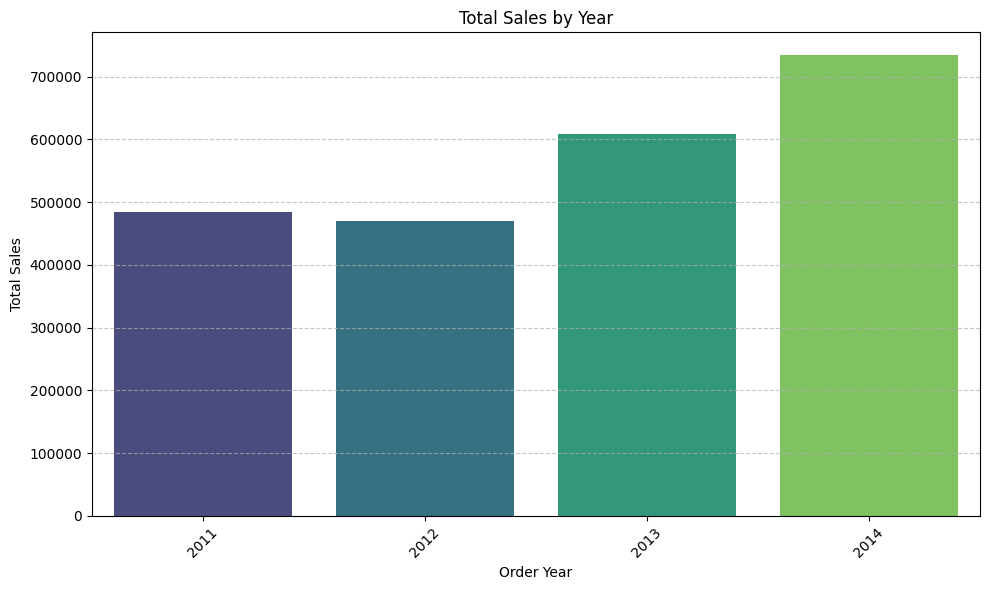

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year from 'Order Date'
superstore['Order Year'] = superstore['Order Date'].dt.year

# Aggregate sales by Order Year
yearly_sales = superstore.groupby('Order Year')['Sales'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Order Year', y='Sales', data=yearly_sales, palette='viridis')
plt.title('Total Sales by Year')
plt.xlabel('Order Year')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

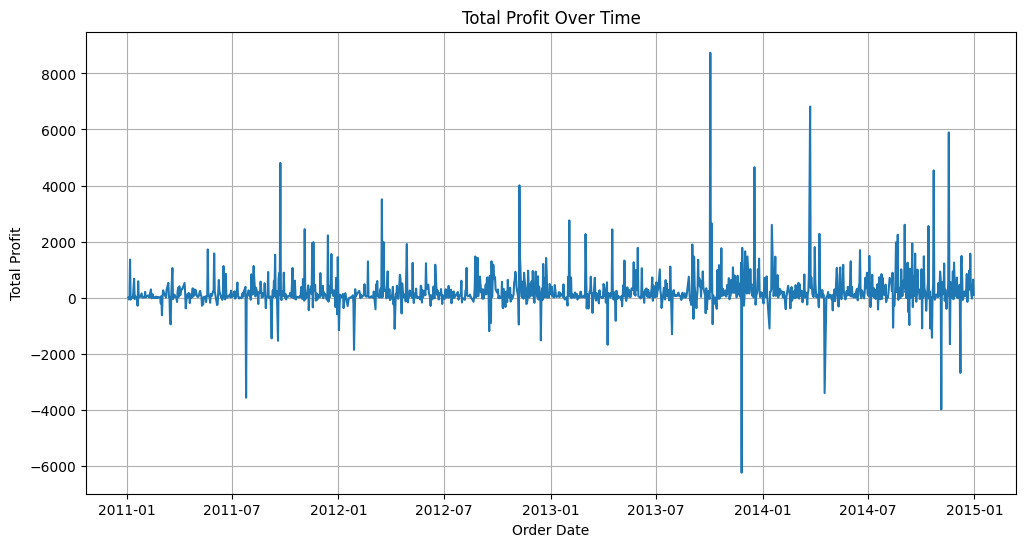

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate sales by Order Date
daily_sales = superstore.groupby('Order Date')['Profit'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Date', y='Profit', data=daily_sales)
plt.title('Total Profit Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

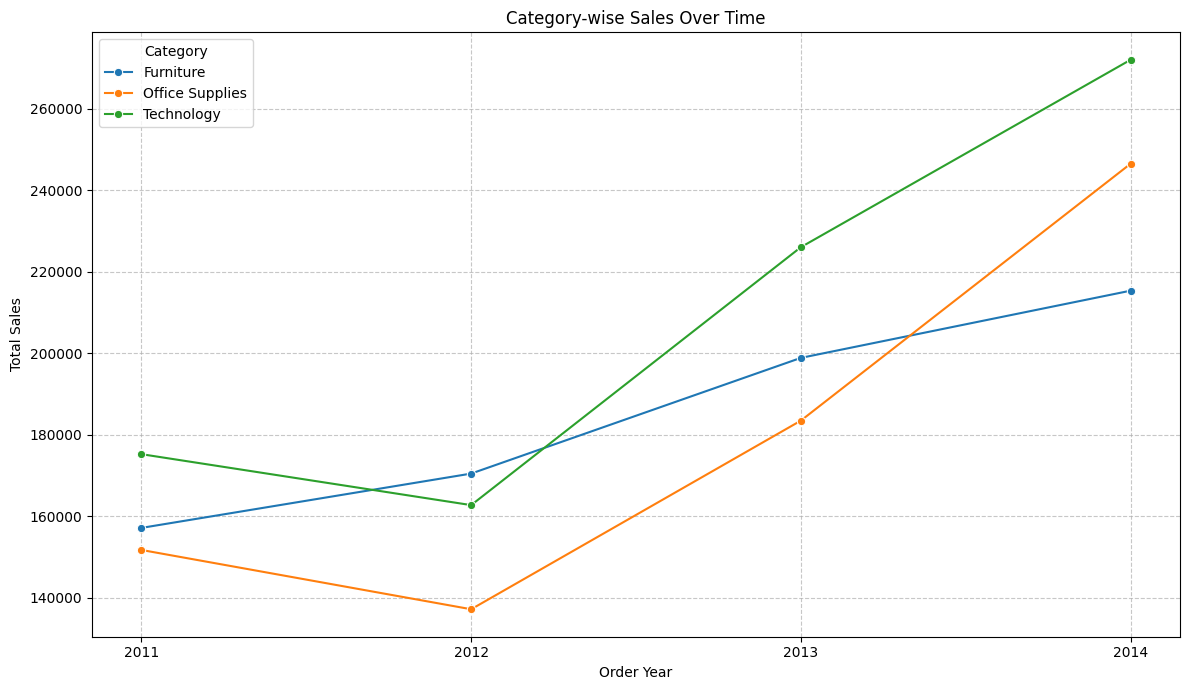

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
superstore['Order Year'] = superstore['Order Date'].dt.year
category_yearly_sales = superstore.groupby(['Order Year', 'Category'])['Sales'].sum().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(x='Order Year', y='Sales', hue='Category', data=category_yearly_sales, marker='o')
plt.title('Category-wise Sales Over Time')
plt.xlabel('Order Year')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(category_yearly_sales['Order Year'].unique())
plt.legend(title='Category')
plt.tight_layout()
plt.show()

In [92]:
# Aggregate Profit at daily level
daily_profit = superstore.groupby('Order Date')['Profit'].sum().reset_index()

# Rename columns for Prophet
daily_profit.columns = ['ds', 'y']

daily_profit.head()


,ds,y
0,2011-01-04,5.5512
1,2011-01-05,-65.9901
2,2011-01-06,4.8840
3,2011-01-07,1358.0524
4,2011-01-08,-71.9621


In [93]:
!pip install prophet
from prophet import Prophet


In [94]:
prophet_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

prophet_model.fit(daily_profit)


In [95]:
# Forecast next 90 days
future = prophet_model.make_future_dataframe(periods=90)
forecast = prophet_model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


,ds,yhat,yhat_lower,yhat_upper
0,2011-01-04,89.281491,-806.715272,940.791841
1,2011-01-05,71.340598,-801.353817,969.591086
2,2011-01-06,101.931887,-745.347402,1006.238883
3,2011-01-07,105.398865,-786.825564,968.604508
4,2011-01-08,-19.470830,-886.877005,905.236854


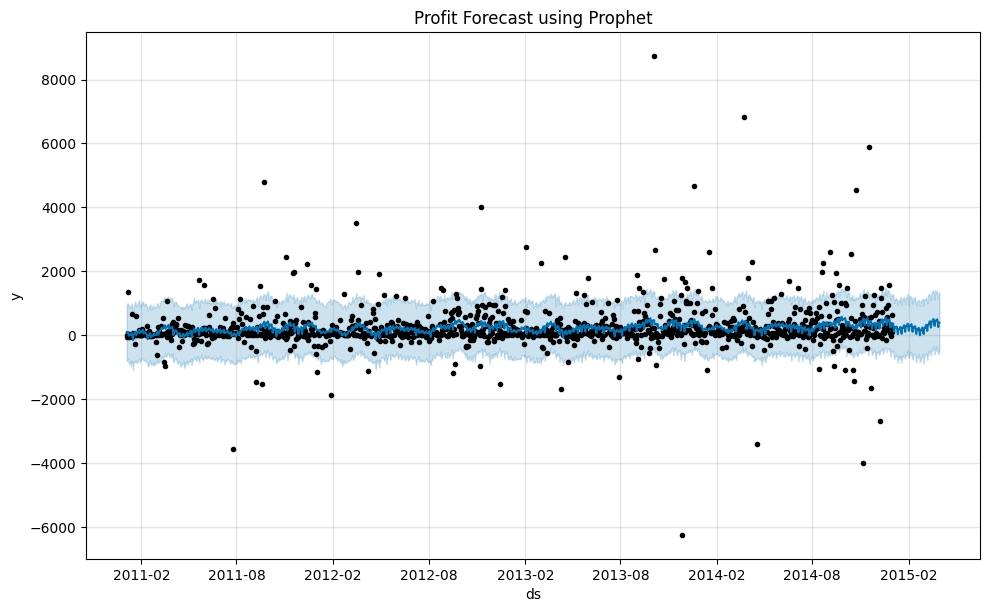

In [96]:
prophet_model.plot(forecast)
plt.title("Profit Forecast using Prophet")
plt.show()


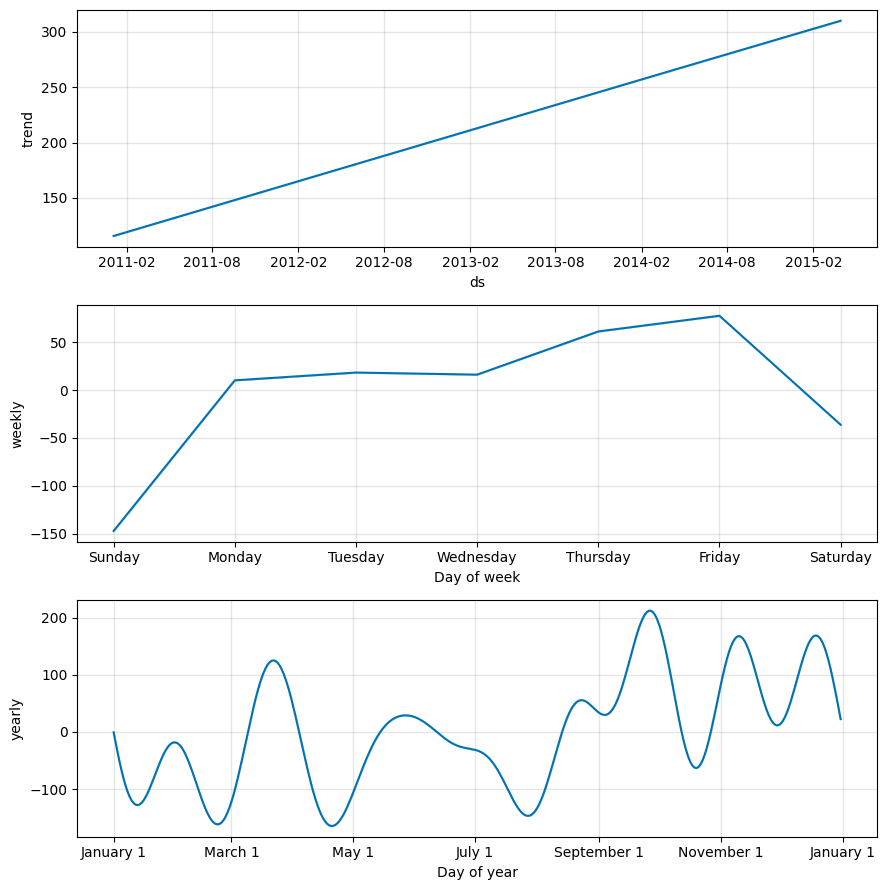

In [97]:
prophet_model.plot_components(forecast)
plt.show()


In [98]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(daily_profit) * 0.8)
train_df = daily_profit.iloc[:train_size]
test_df = daily_profit.iloc[train_size:]

print(f"Training data points: {len(train_df)}")
print(f"Testing data points: {len(test_df)}")

Training data points: 990
Testing data points: 248


In [99]:
# Re-initialize and train Prophet model on the training data
prophet_model_train = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)
prophet_model_train.fit(train_df)

In [100]:
# Create future dataframe for the test period
future_test = prophet_model_train.make_future_dataframe(periods=len(test_df), include_history=False)

# Make predictions on the test set
forecast_test = prophet_model_train.predict(future_test)

# Merge actual values with predictions
performance = pd.merge(test_df, forecast_test[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='left')

display(performance.head())

,ds,y,yhat,yhat_lower,yhat_upper
0,2014-04-05,110.1777,304.534065,-496.212533,1210.163697
1,2014-04-07,44.0304,294.709635,-485.250804,1101.263196
2,2014-04-08,-341.1727,236.635617,-601.690239,1083.811943
3,2014-04-09,2276.8183,285.707006,-601.977419,1088.774138
4,2014-04-10,411.2821,310.769600,-545.767103,1178.801350


In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Drop rows with NaN values in 'y' or 'yhat' columns before calculating metrics
performance_cleaned = performance.dropna(subset=['y', 'yhat'])

# Calculate evaluation metrics on the cleaned data
mae = mean_absolute_error(performance_cleaned['y'], performance_cleaned['yhat'])
mse = mean_squared_error(performance_cleaned['y'], performance_cleaned['yhat'])
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 492.19
Mean Squared Error (MSE): 737472.10
Root Mean Squared Error (RMSE): 858.76


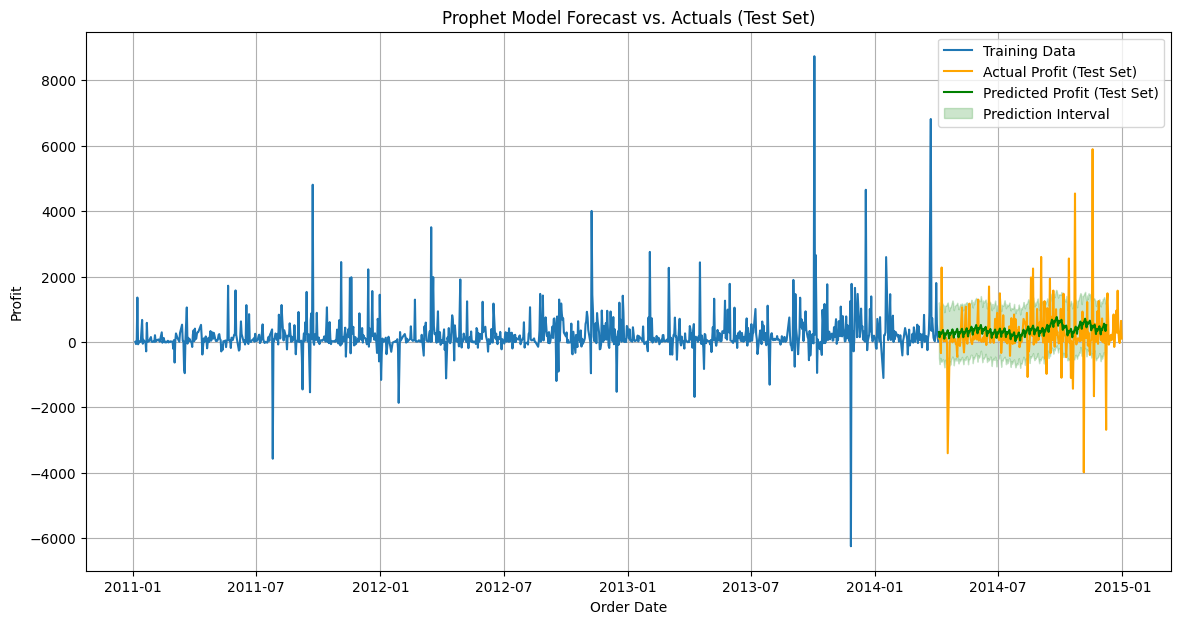

In [102]:
# Plot the forecast vs actuals for the test period
plt.figure(figsize=(14, 7))
plt.plot(train_df['ds'], train_df['y'], label='Training Data')
plt.plot(test_df['ds'], test_df['y'], label='Actual Profit (Test Set)', color='orange')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Predicted Profit (Test Set)', color='green')
plt.fill_between(forecast_test['ds'], forecast_test['yhat_lower'], forecast_test['yhat_upper'], color='green', alpha=0.2, label='Prediction Interval')
plt.title('Prophet Model Forecast vs. Actuals (Test Set)')
plt.xlabel('Order Date')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.show()

In [103]:
# Feature engineering for xAI
superstore_xai = superstore.copy()

superstore_xai['Order Year'] = superstore_xai['Order Date'].dt.year
superstore_xai['Order Month'] = superstore_xai['Order Date'].dt.month

features = ['Sales', 'Discount', 'Quantity', 'Order Month']
X = superstore_xai[features]
y = superstore_xai['Profit']


In [104]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)


RandomForestRegressor(random_state=42)

In [105]:
# !pip install shap
import shap

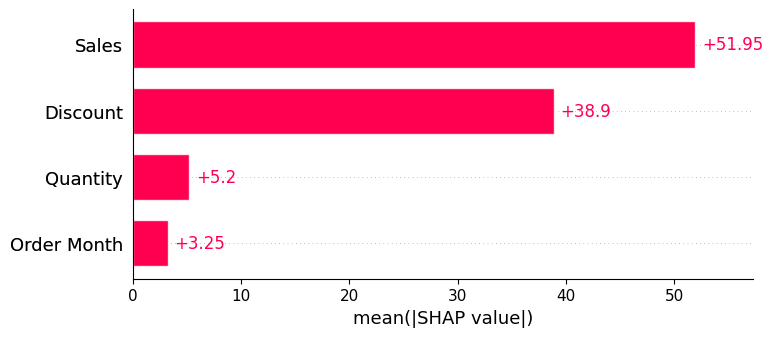

In [106]:
explainer = shap.TreeExplainer(rf_model)
shap_explanation = explainer(X.sample(500))
shap.plots.bar(shap_explanation)

/tmp/ipython-input-3051193012.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_explanation)


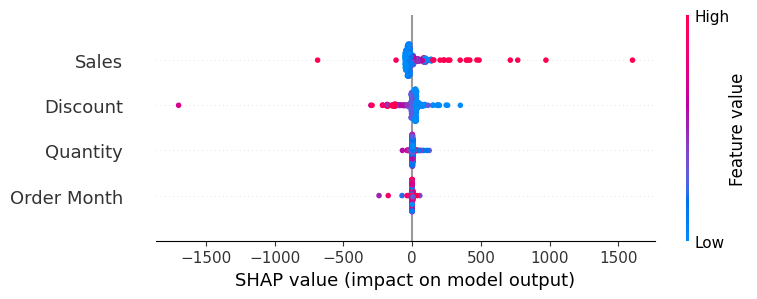

In [107]:
shap.summary_plot(shap_explanation)

In [108]:
mean_abs = np.abs(shap_explanation.values).mean(axis=0)
feat_imp = pd.Series(mean_abs,
index=X.columns).sort_values(ascending=False)
print("Feature importance (mean |SHAP|):")
print(feat_imp) # Most importance features

Feature importance (mean |SHAP|):
Sales          51.950397
Discount       38.901160
Quantity        5.198295
Order Month     3.245781
dtype: float64


In [109]:
top3 = list(feat_imp.head(3).index)
print("Top 3 features:", top3)
# Top 3 features:

Top 3 features: ['Sales', 'Discount', 'Quantity']


In [110]:
#!pip install shap PyALE lime
#!pip install PyALE

INFO:PyALE._ALE_generic:Continuous feature detected.
INFO:PyALE._ALE_generic:Discrete feature detected.
INFO:PyALE._ALE_generic:Discrete feature detected.


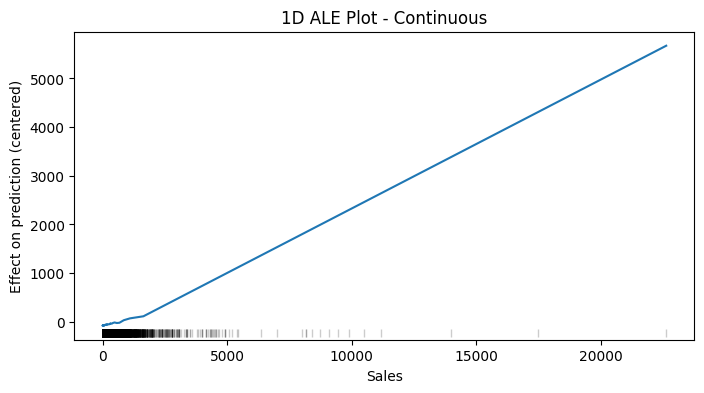

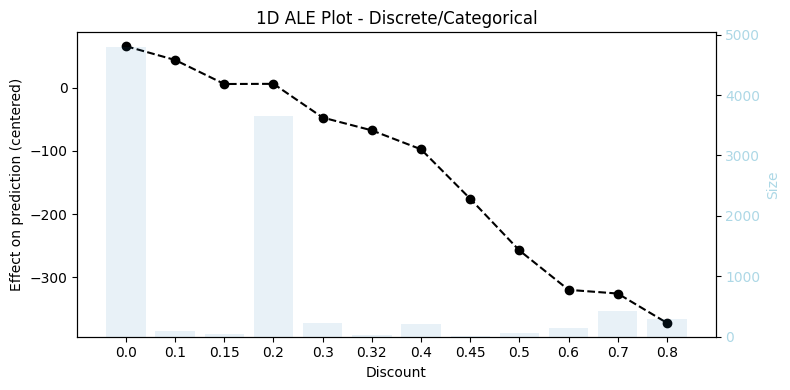

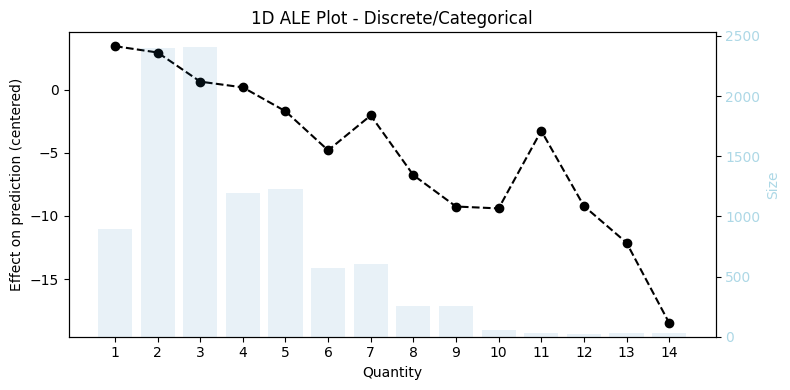

In [111]:
from PyALE import ale
ale_1 = ale(X=X, model=rf_model, feature=[top3[0]], grid_size=50,
include_CI=False)
ale_2 = ale(X=X, model=rf_model, feature=[top3[1]], grid_size=50,
include_CI=False)
ale_3 = ale(X=X, model=rf_model, feature=[top3[2]], grid_size=50,
include_CI=False)

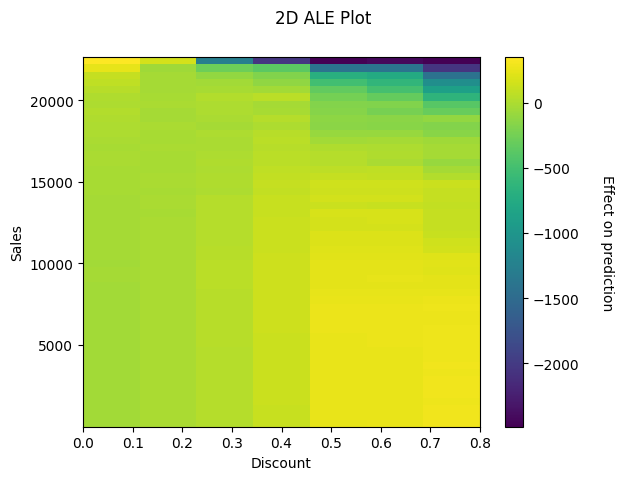

In [112]:
ale_2d = ale(X=X, model=rf_model, feature=[top3[0], top3[1]],
grid_size=50)

In [113]:
#!pip install lime

/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

Intercept 73.2162205929227
Prediction_local [-208.73005845]
Right: -2472.1958520000026


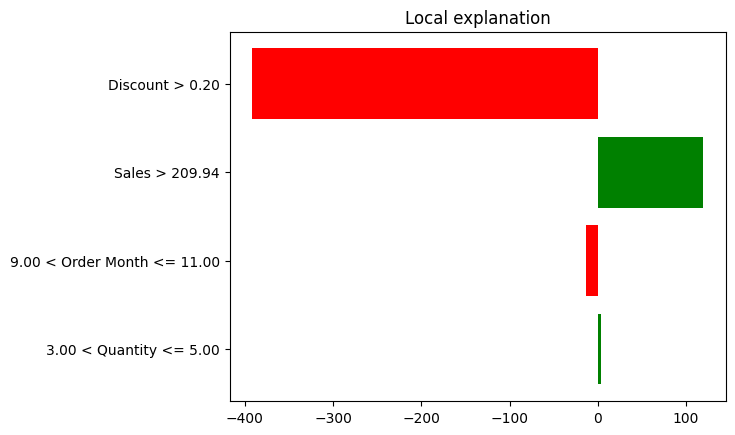

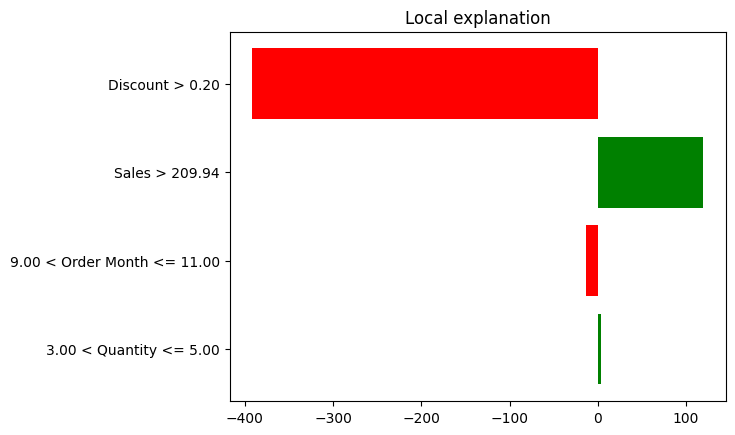

In [114]:
import lime
import lime.lime_tabular
X_featurenames = X.columns
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
 np.array(X),
 feature_names=X_featurenames,
 class_names=['Random Forest'],
 verbose=True,
 mode='regression'
)
idx = 10 # or any index within len(X)
exp = lime_explainer.explain_instance(
 X.iloc[idx],
 rf_model.predict,
 num_features=10
 )
exp.as_pyplot_figure()